# 
2 - Overview of the Problem set
Problem Statement: You are given a dataset ("data.h5") containing:
- a training set of m_train images labeled as cat (y=1) or non-cat (y=0)
- a test set of m_test images labeled as cat or non-cat
- each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).

You will build a simple image-recognition algorithm that can correctly classify pictures as cat or non-cat.
Let's get more familiar with the dataset. Load the data by running the following code.

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

In [65]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [1], it's a 'cat' picture.


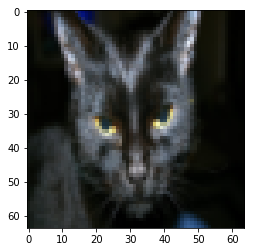

In [66]:
# Example of a picture
index = 25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:,index]) + ", it's a '" + classes[np.squeeze(train_set_y[:,index])].decode("utf-8") +  "' picture.")

Exercise: Find the values for:
- m_train (number of training examples)
- m_test (number of test examples)
- num_px (= height = width of a training image)

In [67]:
m_train = train_set_y.shape[1]
m_test = test_set_y.shape[1]
num_px = train_set_x_orig.shape[1]

In [68]:
print(train_set_x_orig.shape)
print(test_set_x_orig.shape)
print("height of each image is",train_set_x_orig.shape[1],"width of each image is",train_set_x_orig.shape[2])

(209, 64, 64, 3)
(50, 64, 64, 3)
height of each image is 64 width of each image is 64



Exercise: Reshape the training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num_px∗num_px∗3, 1).
 

In [69]:
train_set_x_flatten=train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
print(train_set_x_flatten.shape)

(12288, 209)


In [70]:
test_set_x_flatten=test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T
print(test_set_x_flatten.shape)

(12288, 50)


standardize the data

In [71]:
train_set_x=train_set_x_flatten/255
test_set_x=test_set_x_flatten/255

Building the parts of our algorithm

a. Helper Function

In [72]:
def sigmoid(z):
    s=1/(1+np.exp(-z))
    return s

b. initializing parameters

In [73]:
def initialize_with_zeros(dim):
    w=np.zeros(shape=(dim,1))
    b=0
    assert(w.shape==(dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    return w,b

In [74]:
dim=2 
print(initialize_with_zeros(dim))

(array([[0.],
       [0.]]), 0)


c. Forward and backward propagation

In [85]:
def propagate(w,b,X,Y):
    m=X.shape[1]
    Z=np.dot(w.T,X)+b #row vector
    A=sigmoid(Z)  #row vector
    cost=(-1/m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A)) #number
    dw=(1/m)*np.dot(X,(A-Y).T) #row vector
    db=(1/m)*np.sum(A-Y) #number
    assert(dw.shape==w.shape)
    #assert(db.dtype==float)
    cost=np.squeeze(cost)
    assert(cost.shape==())
    grads={"dw":dw, "db":db}
    return grads,cost

In [86]:
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


d. Optimization

In [89]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs=[]
    for i in range(num_iterations):
        grads,cost=propagate(w,b,X,Y)
        dw=grads["dw"]
        db=grads["db"]
        w=w-learning_rate*dw
        b=b-learning_rate*db
        if i%100==0:
            costs.append(cost)
        if print_cost and i%100==0:
            print ("Cost after iteration %i: %f" % (i, cost))
    params={"w":w,"b":b}   
    grads={"dw":dw,"db":db}
    return params, grads, costs
          

In [90]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.1124579 ]
 [0.23106775]]
b = 1.5593049248448891
dw = [[0.90158428]
 [1.76250842]]
db = 0.4304620716786828


e. Prediction

In [77]:
def predict(w,b,X):
    m=X.shape[1]
    Y_prediction=np.zeros((1,m))
    w.reshape(X.shape[0],1)
    A=sigmoid(np.dot(w.T,X)+b)
    for i in range(A.shape[1]):
        Y_prediction[0,i]=1 if A[0,i]>.5 else 0
    assert(Y_prediction.shape==(1,m)) 
    return Y_prediction

In [91]:
print("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1.]]


f. Merge all functions into a model

In [92]:
def model(X_train,Y_train,X_test,Y_test,num_iterations=2000, learning_rate=0.5,print_cost=False):
    dim=X_train.shape[0]
    w,b=initialize_with_zeros(dim)
    params, grads, costs=optimize(w, b, X_train,Y_train, num_iterations, learning_rate, print_cost = False)
    w=params["w"]
    b=params["b"]
    Y_prediction_test=predict(w,b,X_test)
    Y_prediction_train=predict(w,b,X_train)
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d
    
    

In [94]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


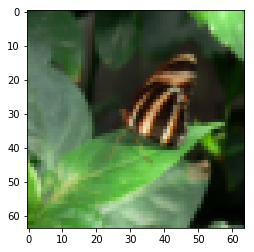

In [97]:
# Example of a picture that was wrongly classified.
index = 5
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
#print ("y = " + str(test_set_y[0, index]) + ", you predicted that it is a \"" + classes[d["Y_prediction_test"][0, index]].decode("utf-8") +  "\" picture.")

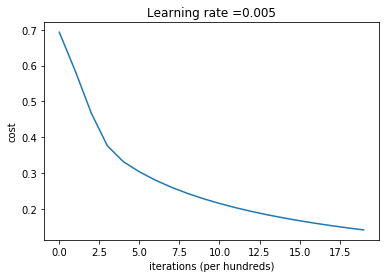

In [95]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



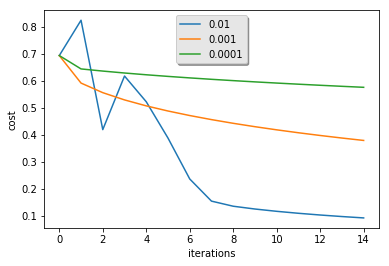

In [98]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()